In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

# Get all CSVs into one data frame
from FRVRS import fu, nu
from datetime import timedelta
from pandas import DataFrame
import numpy as np
import os
import os.path as osp

frvrs_logs_df = nu.load_data_frames(frvrs_logs_df='frvrs_logs_df')['frvrs_logs_df']
print(frvrs_logs_df.shape) # (829277, 114)

Attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/pkl/frvrs_logs_df.pkl.
Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from '/home/dbabbitt/anaconda3/envs/itm_analysis_reporting/lib/python3.7/site-packages/pandas/_libs/internals.cpython-37m-x86_64-linux-gnu.so'>
No pickle exists for frvrs_logs_df - attempting to load /mnt/c/Users/DaveBabbitt/Documents/GitHub/itm-analysis-reporting/saves/csv/frvrs_logs_df.csv.
(829116, 113)



## Abstract
**Methods**:

In [3]:

# Get the count of files with only one triage scene in them
from pandas import Series

mask_series = (frvrs_logs_df.scene_type == 'Triage') & (frvrs_logs_df.is_scene_aborted == False) & (frvrs_logs_df.is_a_one_triage_file == True)
responders_count = frvrs_logs_df[mask_series].groupby('file_name').size().shape[0]
counts_list = [df.patient_id.nunique() for _, df in frvrs_logs_df[mask_series].groupby(fu.scene_groupby_columns)]
df = nu.get_statistics(Series(counts_list).to_frame().rename(columns={0: 'patient_count'}), ['patient_count'])
patients_count = int(df.T['mean'].squeeze())
patients_sd = int(df.T['SD'].squeeze())

# Infer the number of responders from the files with one triage scene
print(
    f'A cohort of {responders_count} EMS clinicians and healthcare professionals engaged in a high-fidelity VR simulation using VRFirstResponder,'
    f' encountering {patients_count} simulated patients (SD = {patients_sd}) with varying injury severity. Metrics including time to control life-threatening hemorrhage and triage'
    ' efficacy were analyzed using median [JF4] and interquartile ranges (IQR).'
)

A cohort of 357 EMS clinicians and healthcare professionals engaged in a high-fidelity VR simulation using VRFirstResponder, encountering 11 simulated patients (SD = 1) with varying injury severity. Metrics including time to control life-threatening hemorrhage and triage efficacy were analyzed using median [JF4] and interquartile ranges (IQR).



**Results**: The median time to triage the entire scene was 7:38 minutes (SD = 2:27, IQR = 6:13, 8:59). A robust 93% of participants successfully implemented all required hemorrhage control, with a median time of 4:54 minutes for life-threatening hemorrhage control (SD = 1:48, IQR = 3:57, 6:08). Hemorrhage control per patient took a median of 14 seconds (SD = 0:28, IQR = 0:09, 0:23). Participants accurately tagged 73% of patients and 17% effectively utilized the SALT sort commands for optimal patient evaluation.


## Methods
### Participants

In [4]:

print(
    f'{responders_count} EMS clinicians and healthcare professionals engaged in a VR simulation of a bomb/blast scenario utilizing VRFirstResponder,'
    ' a high-fidelity, fully immersive, automated, customizable, and programmable VR simulation platform.'
    ' All participants signed informed consent approved by the Ohio State IRB.'
)

357 EMS clinicians and healthcare professionals engaged in a VR simulation of a bomb/blast scenario utilizing VRFirstResponder, a high-fidelity, fully immersive, automated, customizable, and programmable VR simulation platform. All participants signed informed consent approved by the Ohio State IRB.



## Data Analysis
### Triage Efficiency
The median time to triage the entire scene was 7:38 minutes (SD = 2:27, IQR = 6:13, 8:59). A robust 93% of participants successfully implemented all required hemorrhage control, with a median time of 4:54 minutes for life-threatening hemorrhage control (SD = 1:48, IQR = 3:57, 6:08). Hemorrhage control per patient took a median of 14 seconds (SD = 0:28, IQR = 0:09, 0:23).


### Triage Accuracy
Participants accurately tagged 79% of patients (SD = 33) and 17% effectively utilized the SALT sort commands for optimal patient evaluation. Tag performance varied across the prioritization levels including Minimal (M = .81, SD = .31), Delayed (M = .79, SD = .35), Immediate (M = .84, SD = 24), Expectant (M = .70, SD = .46), and Dead (M = .97, SD = .17). None of the patients were not tagged. The category with the highest number of errors was Expectant (29.7%), followed by Delayed (27.6%), followed by Minimal (22.4%), followed by Immediate (22.3%) and Dead (2.5%). 


## Exploratory Metrics: Movement Efficiency (de Visser, Babbitt)
Describe location metrics (Distance traveled, Patient revisits, Movement efficiency, Ideal movement difference score from actual)

In [17]:

# base_mask_series = (frvrs_logs_df.scene_type == 'Triage') & (frvrs_logs_df.is_scene_aborted == False) & (frvrs_logs_df.is_a_one_triage_file == True)
mask_series = (frvrs_logs_df.action_type == 'PATIENT_ENGAGED')# & base_mask_series
distance_delta_df = fu.get_distance_deltas_data_frame(frvrs_logs_df[mask_series])
print(distance_delta_df.shape) #(348, 13)
print(list(distance_delta_df.columns))

(694, 11)
['session_uuid', 'scene_id', 'last_still_engagement', 'actual_engagement_distance', 'ideal_engagement_distance', 'measure_of_ideal_ordering', 'distracted_engagement_distance', 'measure_of_distracted_ordering', 'measure_of_right_ordering', 'actual_ideal_delta', 'actual_distracted_delta']


In [18]:

statistics_df = nu.get_statistics(distance_delta_df, ['actual_engagement_distance', 'actual_ideal_delta', 'measure_of_ideal_ordering', 'measure_of_right_ordering'])
statistics_df

,actual_engagement_distance,actual_ideal_delta,measure_of_ideal_ordering,measure_of_right_ordering
mean,24.225814,-0.026130,0.447565,0.585026
mode,0.000000,0.000000,1.000000,1.000000
median,27.797720,0.000000,0.430323,0.704537
SD,15.327438,4.947445,0.439818,0.436708
min,0.000000,-29.780528,-0.997128,-0.997128
25%,9.925315,-1.360942,0.102999,0.245965
50%,27.797720,0.000000,0.430323,0.704537
75%,38.201777,2.731774,0.898186,1.000000
max,91.247935,16.960349,1.000000,1.000000



## The Low Adherence to SALT
There may be several reasons why there was such a low adherence (17%) to the SALT protocol. It is possible that other factors drove the triage order such as whichever patient was nearest to them.

In [19]:

mask_series = (distance_delta_df.measure_of_right_ordering == 1.0)
distance_delta_df['adherence_to_salt'] = mask_series
100 * distance_delta_df[mask_series].shape[0] / distance_delta_df.shape[0]

29.68299711815562

In [20]:

distance_delta_df['has_patient_in_agony'] = False
mood_columns_list = ['patient_demoted_mood', 'patient_record_mood', 'patient_engaged_mood']
for (session_uuid, scene_id), idx_df in distance_delta_df.groupby(fu.scene_groupby_columns):
    
    # Get the whole scene history
    mask_series = True
    for cn in fu.scene_groupby_columns: mask_series &= (frvrs_logs_df[cn] == eval(cn))
    scene_df = frvrs_logs_df[mask_series]
    
    # Get whether any patient in the scene is in agony
    mask_series = False
    for cn in mood_columns_list: mask_series |= (scene_df[cn] == 'agony')
    
    # Mark the scene in distance delta as agonistic
    if mask_series.any(): distance_delta_df.loc[idx_df.index, 'has_patient_in_agony'] = True

In [39]:

df = distance_delta_df.groupby(['adherence_to_salt', 'has_patient_in_agony']).size()
display(df)

adherence_to_salt  has_patient_in_agony
False              False                   135
                   True                    353
True               False                   136
                   True                     70
dtype: int64

In [41]:

# Perform the chi-square test for independence
from scipy.stats import chi2_contingency
import pandas as pd

table = pd.crosstab(distance_delta_df.adherence_to_salt, distance_delta_df.has_patient_in_agony)
chi2, pval, _, _ = chi2_contingency(table)

# Print the results
print('Chi-square statistic:', chi2)
print('p-value:', pval)

# Interpretation
if pval < 0.05:
    print('There is a statistically significant association between adherence_to_salt and has_patient_in_agony.')
else:
    print('There is not enough evidence to conclude a statistically significant association between adherence_to_salt and has_patient_in_agony.')

Chi-square statistic: 87.93050692344421
p-value: 6.7794952709603e-21
There is a statistically significant association between adherence_to_salt and has_patient_in_agony.


In [43]:

# Group the data by adherence_to_salt and has_patient_in_agony
grouped_data = distance_delta_df.groupby(['adherence_to_salt', 'has_patient_in_agony'])

# Calculate the proportion of False adherence_to_salt in each group
proportions = grouped_data.size() / grouped_data.size().sum()

# Calculate the confidence intervals using the Wilson score interval
from scipy.stats import binom

confidence_level = 0.95  # Adjust as needed
z = 1.96  # Standard normal deviate for 95% confidence

for (adherence, agony), proportion in proportions.items():
    n = grouped_data.size().loc[(adherence, agony)]
    lower_bound = binom.ppf(confidence_level / 2, n, proportion) / n
    upper_bound = binom.ppf(1 - confidence_level / 2, n, proportion) / n
    print(f'Adherence: {adherence}, Agony: {agony}, Proportion: {proportion:.4f}, Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]')

Adherence: False, Agony: False, Proportion: 0.1945, Confidence Interval: [0.1926, 0.1926]
Adherence: False, Agony: True, Proportion: 0.5086, Confidence Interval: [0.5071, 0.5099]
Adherence: True, Agony: False, Proportion: 0.1960, Confidence Interval: [0.1912, 0.1985]
Adherence: True, Agony: True, Proportion: 0.1009, Confidence Interval: [0.1000, 0.1000]


In [42]:

# odds_ratio = (353/(70+353)) / (135/(136+135))
odds_ratio = (df.loc[(False, True)]/(df.loc[(True, True)]+df.loc[(False, True)])) / (df.loc[(False, False)]/(df.loc[(True, False)]+df.loc[(False, False)]))
print(
    'When you add back in the orientation and other data, responders dealing with scenes with patients in agony in them'
    f' are ~{odds_ratio:0.2} times more likely to not adhere to the SALT protocol than those without.'
)

When you add back in the orientation and other data, responders dealing with scenes with patients in agony in them are ~1.7 times more likely to not adhere to the SALT protocol than those without.


In [22]:

nu.get_r_squared_value_latex(distance_delta_df['adherence_to_salt'], distance_delta_df['has_patient_in_agony'])

'$r^2=0.13,\\ p<0.0001$'

In [55]:

sns.boxplot?

Signature:
sns.boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    width=0.8,
    dodge=True,
    fliersize=5,
    linewidth=None,
    whis=1.5,
    ax=None,
    **kwargs,
)
Docstring:
Draw a box plot to show distributions with respect to categories.

A box plot (or box-and-whisker plot) shows the distribution of quantitative
data in a way that facilitates comparisons between variables or across
levels of a categorical variable. The box shows the quartiles of the
dataset while the whiskers extend to show the rest of the distribution,
except for points that are determined to be "outliers" using a method
that is a function of the inter-quartile range.

.. note::
    This function always treats one of the variables as categorical and
    draws data at ordinal positions (0, 1, ... n) on the relevant axis,
    even when the data has a numeric or date type.

See th

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

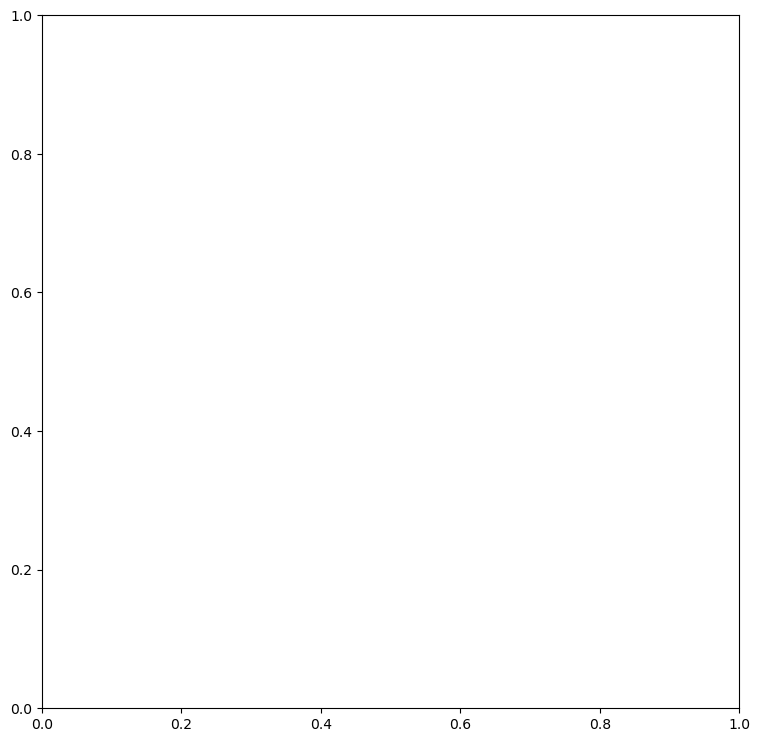

In [52]:

%matplotlib inline
import matplotlib.pyplot as plt

# fu.plot_grouped_box_and_whiskers(
#     distance_delta_df, 'adherence_to_salt', 'has_patient_in_agony', 'Adherence to SALT protocol', 'Scene has a Patient in Agony', transformer_name=None, is_y_temporal=False
# )
import seaborn as sns

# Create a figure and subplots
fig, ax = plt.subplots(1, 1, figsize=(9, 9))

# Create a box plot of the y column grouped by the x column
sns.boxplot(
    x='adherence_to_salt',
    y='has_patient_in_agony',
    showmeans=True,
    data=distance_delta_df,
    ax=ax
)

# Rotate the x-axis labels to prevent overlapping
plt.xticks(rotation=45)

# Label the x- and y-axis
ax.set_xlabel('Adherence to SALT protocol')
ax.set_ylabel('Scene has a Patient in Agony')

plt.show()